In [498]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [499]:
# This is a kaggle dataset named "Data Scientist jobs in US". Below is the link for the same.
# https://www.kaggle.com/sl6149/data-scientist-job-market-in-the-us
data = pd.read_csv('/Users/harshini/Desktop/Thinkful/Data/Practice/data-scientist-job-market-in-the-us/alldata.csv')
data.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [500]:
data.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [501]:
# Remove "reviews" column as it has more Null values and we are not using in this scenario.
data = data.drop('reviews',axis=1)

In [502]:
data.head()

,position,company,description,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA"


In [503]:
# Removing rows with Null values.
data = data.dropna(axis=0)

In [504]:
# Some of the locations have zip code at the end. Let us remove them as they are of no use in our scenario.
# This is a function to remove trailing zip code(if exists) in the locations column.
def location_rename(x):
    l1 = str(x).split(',')
    p = l1[1].strip()
    y = p.split(' ')
    return l1[0]+', '+y[0]

In [505]:
# Calling the function
data.location = data.location.apply(location_rename)

In [506]:
data.head()

,position,company,description,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA"


<b>Question1: What are the top 20 cities with highest number of jobs?</b>

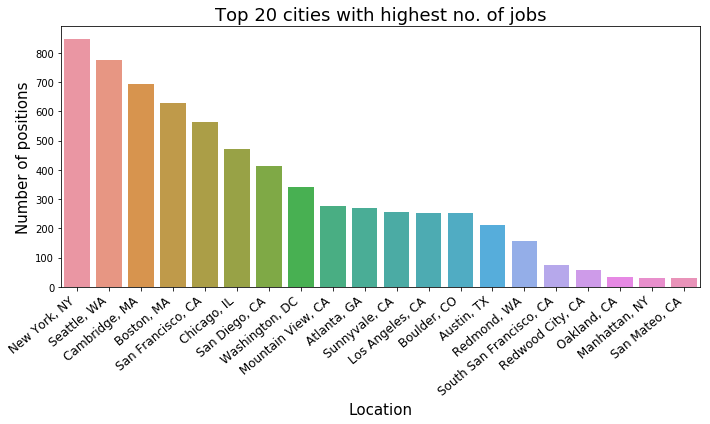

In [507]:
# Creating subplots and setting figsize
fig,a = plt.subplots(figsize=(10,6))
ax = sns.barplot(data=data.groupby('location').count().nlargest(20,'position').reset_index(),x='location',y='position')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_xlabel("Location",fontsize=15)
ax.set_ylabel("Number of positions",fontsize=15)
ax.set_title("Top 20 cities with highest no. of jobs",fontsize=18)
plt.tight_layout()
plt.show()


<b>From the above, it is clear that New York city has more number of jobs in the market.</b>

<b>Question2: 10 companies with high demand for Data Science jobs</b>

In [508]:
# Adding a new column 'designation'. Adding 'Data Scientist' designation for relevant positions.
data.loc[data['position'].str.contains('data',case=False) & data['position'].str.contains('scien',case=False),'designation'] = 'Data Scientist'
data.loc[data['position'].str.contains('data',case=False) & data['position'].str.contains('analyst',case=False),'designation'] = 'Data Scientist'
data.loc[data['position'].str.contains('data',case=False) & data['position'].str.contains('analytics',case=False),'designation'] = 'Data Scientist'
data.loc[data['position'].str.contains('data',case=False) & data['position'].str.contains('engineer',case=False),'designation'] = 'Data Scientist'
data.loc[data['position'].str.contains('data engineering',case=False),'designation'] = 'Data Scientist'
data.loc[data['position'].str.contains('applied scientist',case=False),'designation'] = 'Data Scientist'
data.loc[data['position'].str.contains('research scientist',case=False),'designation'] = 'Data Scientist'
data.loc[data['position'].str.contains('research analyst',case=False),'designation'] = 'Data Scientist'
data.loc[data['position'].str.contains('machine',case=False) & data['position'].str.contains('learn',case=False),'designation'] = 'Data Scientist'

In [509]:
data.designation = data.designation.fillna('Others')

In [510]:
data.head()

,position,company,description,location,designation
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA",Others
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA",Others
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA",Data Scientist
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA",Data Scientist
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA",Data Scientist


In [511]:
ds = data[data['designation'] == 'Data Scientist']

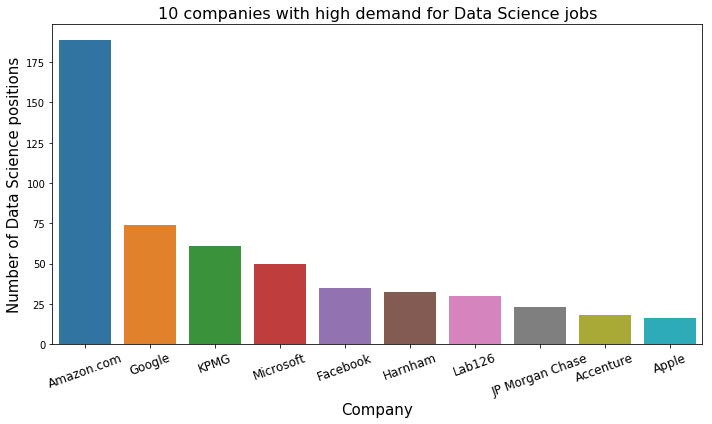

In [512]:
fig,a = plt.subplots(figsize=(10,6))
ax = sns.barplot(data=ds.groupby('company').count().nlargest(10,'designation').reset_index(),x='company',y='designation')
ax.set_xlabel("Company",fontsize=15)
ax.set_ylabel("Number of Data Science positions",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20,fontsize=12)
ax.set_title("10 companies with high demand for Data Science jobs",fontsize=16)
plt.tight_layout()
plt.show()


<b>It is clear from the above that "Amazon" has more number of Data Science positions in the job market followed by Google.</b>

<b>State wise job distribution using countplot</b>

In [513]:
def split_loc(x):
    l1 = str(x).split(',')
    return l1[1].strip()

In [514]:
new = data
new.location = new.location.apply(split_loc)

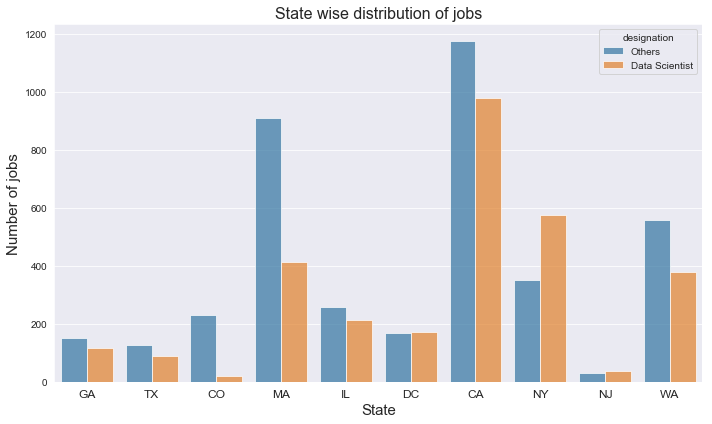

In [525]:
# Number of jobs per state using countplot with hues
sns.set_style('darkgrid')
fig,a = plt.subplots(figsize=(10,6))
ax = sns.countplot(data=new,x='location',hue='designation',alpha=0.7)
ax.set_xlabel("State",fontsize=15)
ax.set_ylabel("Number of jobs",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)
ax.set_title("State wise distribution of jobs",fontsize=16)
plt.tight_layout()
plt.show()